<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading-in-libraries-and-data" data-toc-modified-id="Loading-in-libraries-and-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading in libraries and data</a></span><ul class="toc-item"><li><span><a href="#Setting-presentation-style" data-toc-modified-id="Setting-presentation-style-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Setting presentation style</a></span></li><li><span><a href="#Delimeter-&quot;\t&quot;-leads-to-a-lot-of-mess-upon-import" data-toc-modified-id="Delimeter-&quot;\t&quot;-leads-to-a-lot-of-mess-upon-import-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Delimeter "\t" leads to a lot of mess upon import</a></span><ul class="toc-item"><li><span><a href="#Focus-in-on-Recipient-and-Supplier-column,-the-entities/actors-trading" data-toc-modified-id="Focus-in-on-Recipient-and-Supplier-column,-the-entities/actors-trading-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Focus in on Recipient and Supplier column, the entities/actors trading</a></span></li><li><span><a href="#Get-recipients-via.-finding-&quot;R:&quot;,-drop-nans(?),-get-suppliers-at-R---1-before." data-toc-modified-id="Get-recipients-via.-finding-&quot;R:&quot;,-drop-nans(?),-get-suppliers-at-R---1-before.-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Get recipients via. finding "R:", drop nans(?), get suppliers at R - 1 before.</a></span></li></ul></li><li><span><a href="#Inserting-new-columns----Supplier" data-toc-modified-id="Inserting-new-columns----Supplier-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Inserting new columns -- Supplier</a></span></li><li><span><a href="#Creating-a-dataframe-of-shifted-values-to-the-Suppliers-column,-as-the-columns-are-shifted-off" data-toc-modified-id="Creating-a-dataframe-of-shifted-values-to-the-Suppliers-column,-as-the-columns-are-shifted-off-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Creating a dataframe of shifted values to the Suppliers column, as the columns are shifted off</a></span><ul class="toc-item"><li><span><a href="#Replace-original-with-shifted" data-toc-modified-id="Replace-original-with-shifted-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Replace original with shifted</a></span></li></ul></li><li><span><a href="#Repeating-Supplier-process-for-Recipient-column" data-toc-modified-id="Repeating-Supplier-process-for-Recipient-column-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Repeating Supplier process for Recipient column</a></span></li></ul></li><li><span><a href="#Dropping-null-columns" data-toc-modified-id="Dropping-null-columns-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dropping null columns</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#With-recipient-and-supplier-separated,-drop-the-combined-column" data-toc-modified-id="With-recipient-and-supplier-separated,-drop-the-combined-column-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>With recipient and supplier separated, drop the combined column</a></span></li><li><span><a href="#Removing-&quot;R:&quot;-from-Recipient" data-toc-modified-id="Removing-&quot;R:&quot;-from-Recipient-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Removing "R:" from Recipient</a></span></li></ul></li></ul></li><li><span><a href="#Renaming-remaining-columns-appropriately" data-toc-modified-id="Renaming-remaining-columns-appropriately-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Renaming remaining columns appropriately</a></span><ul class="toc-item"><li><span><a href="#Blank-column,-not-NaN-but-empty-string" data-toc-modified-id="Blank-column,-not-NaN-but-empty-string-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Blank column, not NaN but empty string</a></span></li><li><span><a href="#Forward-fill-repeated-Suppliers" data-toc-modified-id="Forward-fill-repeated-Suppliers-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Forward fill repeated Suppliers</a></span><ul class="toc-item"><li><span><a href="#As-the-first-occurrences-are-always-just-indicating-suppliers,-they-can-be-dropped" data-toc-modified-id="As-the-first-occurrences-are-always-just-indicating-suppliers,-they-can-be-dropped-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>As the first occurrences are always just indicating suppliers, they can be dropped</a></span></li></ul></li></ul></li><li><span><a href="#Saving-cleaned-df2-to-csv" data-toc-modified-id="Saving-cleaned-df2-to-csv-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Saving cleaned df2 to csv</a></span><ul class="toc-item"><li><span><a href="#NaN-in-DeliveryYear-and-NDelivered-represent-pending-deals-per-SIPRI" data-toc-modified-id="NaN-in-DeliveryYear-and-NDelivered-represent-pending-deals-per-SIPRI-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>NaN in DeliveryYear and NDelivered represent pending deals per SIPRI</a></span><ul class="toc-item"><li><span><a href="#Lack-of-comments-replaced-with-&quot;None&quot;" data-toc-modified-id="Lack-of-comments-replaced-with-&quot;None&quot;-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Lack of comments replaced with "None"</a></span></li></ul></li><li><span><a href="#Forward-filling-recipients-and-not-just-suppliers" data-toc-modified-id="Forward-filling-recipients-and-not-just-suppliers-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Forward filling recipients and not just suppliers</a></span></li><li><span><a href="#Removing-(-and-)-from-no.-Ordered-and-Delivered" data-toc-modified-id="Removing-(-and-)-from-no.-Ordered-and-Delivered-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Removing ( and ) from no. Ordered and Delivered</a></span></li></ul></li><li><span><a href="#Beginning-work-on-an-OrderYear-time-series" data-toc-modified-id="Beginning-work-on-an-OrderYear-time-series-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Beginning work on an OrderYear time series</a></span></li><li><span><a href="#Plotting:-big-difference-in-Suppliers-vs.-Recipients" data-toc-modified-id="Plotting:-big-difference-in-Suppliers-vs.-Recipients-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Plotting: big difference in Suppliers vs. Recipients</a></span><ul class="toc-item"><li><span><a href="#Recipient-+-supplier-combos-df" data-toc-modified-id="Recipient-+-supplier-combos-df-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Recipient + supplier combos df</a></span></li></ul></li><li><span><a href="#Top-trading-partners-plot,-the-US-is-the-biggest-supplier" data-toc-modified-id="Top-trading-partners-plot,-the-US-is-the-biggest-supplier-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Top trading partners plot, the US is the biggest supplier</a></span></li><li><span><a href="#Dataframe-of-the-US-vs.-all-other-Suppliers" data-toc-modified-id="Dataframe-of-the-US-vs.-all-other-Suppliers-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Dataframe of the US vs. all other Suppliers</a></span></li><li><span><a href="#Replace-with-mean-year-of-delivery-year-estimations----should-do-this-on-other-DFs" data-toc-modified-id="Replace-with-mean-year-of-delivery-year-estimations----should-do-this-on-other-DFs-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Replace with mean year of delivery year estimations -- should do this on other DFs</a></span></li><li><span><a href="#Cleaning-up-Recipient-and-mostly-Supplier-for-trailing-whitespace-and-difficult-characters-for-Neo4j" data-toc-modified-id="Cleaning-up-Recipient-and-mostly-Supplier-for-trailing-whitespace-and-difficult-characters-for-Neo4j-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Cleaning up Recipient and mostly Supplier for trailing whitespace and difficult characters for Neo4j</a></span><ul class="toc-item"><li><span><a href="#problems-with-'-with-neo4j-querying-means-it-needs-to-be-removed" data-toc-modified-id="problems-with-'-with-neo4j-querying-means-it-needs-to-be-removed-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>problems with ' with neo4j querying means it needs to be removed</a></span></li></ul></li><li><span><a href="#Py2Neo:-Neo4j-integration----creating-Actors-for-states-with-Names" data-toc-modified-id="Py2Neo:-Neo4j-integration----creating-Actors-for-states-with-Names-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Py2Neo: Neo4j integration -- creating Actors for states with Names</a></span><ul class="toc-item"><li><span><a href="#Creates-Actors-that-supply-and-receive-in-Neo4j" data-toc-modified-id="Creates-Actors-that-supply-and-receive-in-Neo4j-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Creates Actors that supply and receive in Neo4j</a></span></li><li><span><a href="#In-retrospect-the-above-could've-been-performed-on-the-columns-I-clean-anyway.-Womp." data-toc-modified-id="In-retrospect-the-above-could've-been-performed-on-the-columns-I-clean-anyway.-Womp.-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>In retrospect the above could've been performed on the columns I clean anyway. Womp.</a></span></li><li><span><a href="#Creates-relationship-of-Actor-supplied--->-Actor-with-properties-minus-Comments-of-columns,-takes-a-hot-minute----TBD:-Clean-up-comment-text-to-include" data-toc-modified-id="Creates-relationship-of-Actor-supplied--->-Actor-with-properties-minus-Comments-of-columns,-takes-a-hot-minute----TBD:-Clean-up-comment-text-to-include-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Creates relationship of Actor supplied --&gt; Actor with properties minus Comments of columns, takes a hot minute -- TBD: Clean up comment text to include</a></span><ul class="toc-item"><li><span><a href="#Amount-of-transactions-in-final_df-for-sense-of-scale-of-the-produced-graph-DB" data-toc-modified-id="Amount-of-transactions-in-final_df-for-sense-of-scale-of-the-produced-graph-DB-11.3.1"><span class="toc-item-num">11.3.1&nbsp;&nbsp;</span>Amount of transactions in final_df for sense of scale of the produced graph DB</a></span></li></ul></li></ul></li><li><span><a href="#NLP-Exploration-of-Comments" data-toc-modified-id="NLP-Exploration-of-Comments-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>NLP Exploration of Comments</a></span><ul class="toc-item"><li><span><a href="#T-sne-and-UMAP-on-text-off-Comments:-need-to-clean-up-previous-bool_df" data-toc-modified-id="T-sne-and-UMAP-on-text-off-Comments:-need-to-clean-up-previous-bool_df-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>T-sne and UMAP on text off Comments: need to clean up previous bool_df</a></span></li><li><span><a href="#Comments-T-SNE-with-y-of-Supplier" data-toc-modified-id="Comments-T-SNE-with-y-of-Supplier-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Comments T-SNE with y of Supplier</a></span></li><li><span><a href="#UMAP-version-of-above" data-toc-modified-id="UMAP-version-of-above-12.3"><span class="toc-item-num">12.3&nbsp;&nbsp;</span>UMAP version of above</a></span></li><li><span><a href="#UMAP-Clustering-all-comments-with-corresponding-words-to-clusters" data-toc-modified-id="UMAP-Clustering-all-comments-with-corresponding-words-to-clusters-12.4"><span class="toc-item-num">12.4&nbsp;&nbsp;</span>UMAP Clustering all comments with corresponding words to clusters</a></span></li><li><span><a href="#Wordcloud-because-I'm-basic----second-hand-and-aid-dominate" data-toc-modified-id="Wordcloud-because-I'm-basic----second-hand-and-aid-dominate-12.5"><span class="toc-item-num">12.5&nbsp;&nbsp;</span>Wordcloud because I'm basic -- second hand and aid dominate</a></span></li></ul></li><li><span><a href="#New-Library-and-NetworkX-time" data-toc-modified-id="New-Library-and-NetworkX-time-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>New Library and NetworkX time</a></span><ul class="toc-item"><li><span><a href="#Centrality-algorithms---Bolivia-is-pagerank'd-and-otherwise-the-US-is-central" data-toc-modified-id="Centrality-algorithms---Bolivia-is-pagerank'd-and-otherwise-the-US-is-central-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>Centrality algorithms - Bolivia is pagerank'd and otherwise the US is central</a></span></li><li><span><a href="#Deriving-propogation-communities-of-interacting-nodes" data-toc-modified-id="Deriving-propogation-communities-of-interacting-nodes-13.2"><span class="toc-item-num">13.2&nbsp;&nbsp;</span>Deriving propogation communities of interacting nodes</a></span></li><li><span><a href="#Removing-all-singleton-groups" data-toc-modified-id="Removing-all-singleton-groups-13.3"><span class="toc-item-num">13.3&nbsp;&nbsp;</span>Removing all singleton groups</a></span></li><li><span><a href="#Checking-if-component-nodes-are-connected----all-are" data-toc-modified-id="Checking-if-component-nodes-are-connected----all-are-13.4"><span class="toc-item-num">13.4&nbsp;&nbsp;</span>Checking if component nodes are connected -- all are</a></span></li></ul></li><li><span><a href="#Geospatial-work" data-toc-modified-id="Geospatial-work-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Geospatial work</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Groups-linked-to-countries-need-to-be-changed-to-that-country-for-this-mapping" data-toc-modified-id="Groups-linked-to-countries-need-to-be-changed-to-that-country-for-this-mapping-14.0.1"><span class="toc-item-num">14.0.1&nbsp;&nbsp;</span>Groups linked to countries need to be changed to that country for this mapping</a></span></li></ul></li></ul></li><li><span><a href="#Data-prep-for-binary-classification-of-U.S.-or-not-as-supplier" data-toc-modified-id="Data-prep-for-binary-classification-of-U.S.-or-not-as-supplier-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Data prep for binary classification of U.S. or not as supplier</a></span><ul class="toc-item"><li><span><a href="#Dropping-Comments,-N-Ordered-and-Delivered" data-toc-modified-id="Dropping-Comments,-N-Ordered-and-Delivered-15.1"><span class="toc-item-num">15.1&nbsp;&nbsp;</span>Dropping Comments, N Ordered and Delivered</a></span></li><li><span><a href="#Test-train-split" data-toc-modified-id="Test-train-split-15.2"><span class="toc-item-num">15.2&nbsp;&nbsp;</span>Test-train split</a></span></li><li><span><a href="#Encoding-top-10-categories-with-one-hot-of-cat.-features" data-toc-modified-id="Encoding-top-10-categories-with-one-hot-of-cat.-features-15.3"><span class="toc-item-num">15.3&nbsp;&nbsp;</span>Encoding top 10 categories with one-hot of cat. features</a></span></li><li><span><a href="#SMOTE-for-imbalanced-classes" data-toc-modified-id="SMOTE-for-imbalanced-classes-15.4"><span class="toc-item-num">15.4&nbsp;&nbsp;</span>SMOTE for imbalanced classes</a></span></li><li><span><a href="#Grid-searched-lasso-Logistic-Regression" data-toc-modified-id="Grid-searched-lasso-Logistic-Regression-15.5"><span class="toc-item-num">15.5&nbsp;&nbsp;</span>Grid searched lasso Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Note:-solver-liblinear-needed-to-lasso-l1-regression" data-toc-modified-id="Note:-solver-liblinear-needed-to-lasso-l1-regression-15.5.1"><span class="toc-item-num">15.5.1&nbsp;&nbsp;</span>Note: solver liblinear needed to lasso l1 regression</a></span></li></ul></li><li><span><a href="#Using-f1-weighted-as-an-imbalanced-metric" data-toc-modified-id="Using-f1-weighted-as-an-imbalanced-metric-15.6"><span class="toc-item-num">15.6&nbsp;&nbsp;</span>Using f1 weighted as an imbalanced metric</a></span></li><li><span><a href="#Grid-searched-AdaBoostClassifier" data-toc-modified-id="Grid-searched-AdaBoostClassifier-15.7"><span class="toc-item-num">15.7&nbsp;&nbsp;</span>Grid searched AdaBoostClassifier</a></span></li><li><span><a href="#Linear-SVM" data-toc-modified-id="Linear-SVM-15.8"><span class="toc-item-num">15.8&nbsp;&nbsp;</span>Linear SVM</a></span></li><li><span><a href="#Multinomial-NB" data-toc-modified-id="Multinomial-NB-15.9"><span class="toc-item-num">15.9&nbsp;&nbsp;</span>Multinomial NB</a></span></li><li><span><a href="#Feature-Selection-with-KBest" data-toc-modified-id="Feature-Selection-with-KBest-15.10"><span class="toc-item-num">15.10&nbsp;&nbsp;</span>Feature Selection with KBest</a></span></li></ul></li><li><span><a href="#Neural-network-classifier" data-toc-modified-id="Neural-network-classifier-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Neural network classifier</a></span><ul class="toc-item"><li><span><a href="#Still-figuring-out-weighted-f1-score-for-keras-so-commenting-this-out" data-toc-modified-id="Still-figuring-out-weighted-f1-score-for-keras-so-commenting-this-out-16.1"><span class="toc-item-num">16.1&nbsp;&nbsp;</span>Still figuring out weighted f1 score for keras so commenting this out</a></span></li><li><span><a href="#ADASYN-sampling" data-toc-modified-id="ADASYN-sampling-16.2"><span class="toc-item-num">16.2&nbsp;&nbsp;</span>ADASYN sampling</a></span></li></ul></li><li><span><a href="#Sampling-top-15-features" data-toc-modified-id="Sampling-top-15-features-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Sampling top 15 features</a></span><ul class="toc-item"><li><span><a href="#Test-train-split" data-toc-modified-id="Test-train-split-17.1"><span class="toc-item-num">17.1&nbsp;&nbsp;</span>Test-train split</a></span></li><li><span><a href="#Encoding-top-15-categories" data-toc-modified-id="Encoding-top-15-categories-17.2"><span class="toc-item-num">17.2&nbsp;&nbsp;</span>Encoding top 15 categories</a></span></li><li><span><a href="#SMOTE" data-toc-modified-id="SMOTE-17.3"><span class="toc-item-num">17.3&nbsp;&nbsp;</span>SMOTE</a></span></li><li><span><a href="#Testing-more-features-with-MultinomialNB" data-toc-modified-id="Testing-more-features-with-MultinomialNB-17.4"><span class="toc-item-num">17.4&nbsp;&nbsp;</span>Testing more features with MultinomialNB</a></span></li></ul></li><li><span><a href="#Comparing-performance-with-scaling-encoded-features" data-toc-modified-id="Comparing-performance-with-scaling-encoded-features-18"><span class="toc-item-num">18&nbsp;&nbsp;</span>Comparing performance with scaling encoded features</a></span><ul class="toc-item"><li><span><a href="#Test-train-split" data-toc-modified-id="Test-train-split-18.1"><span class="toc-item-num">18.1&nbsp;&nbsp;</span>Test-train split</a></span></li></ul></li></ul></div>

# Loading in libraries and data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [2]:
# credit to feature engineering course by Soledad Gali for usage instructions of feature_engine
# to split the datasets
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder

In [3]:
#Import svm model
from sklearn import svm
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

#custom score for f1_weighted to cv with
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
import nxneo4j as nx
from wordcloud import WordCloud
# from sklearn.cluster import KMeans
# from yellowbrick.text import UMAPVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import TSNEVisualizer
from py2neo import Graph, Node, Relationship
#removing stopwords from comments
from nltk.corpus import stopwords
from neo4j import GraphDatabase
#https://towardsdatascience.com/using-python-to-create-a-world-map-from-a-list-of-country-names-cd7480d03b10

#function to convert to alpah2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
# #https://amaral.northwestern.edu/blog/getting-long-lat-list-cities
# from opencage.geocoder import OpenCageGeocode
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest, f_classif
# from keras import Sequential
# from keras.layers import Dense

from sklearn.linear_model import RidgeClassifierCV

from sklearn.neural_network import MLPClassifier

#https://www.kaggle.com/qianchao/smote-with-imbalance-data
from imblearn.over_sampling import ADASYN

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

#https://www.kaggle.com/qianchao/smote-with-imbalance-data
from imblearn.over_sampling import SMOTE

import time 

/Users/michaelburak/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


## Setting presentation style

In [4]:
sns.set_style("dark")
sns.set_context("poster")

In [5]:
sns.color_palette("husl", 9)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8369430560927636, 0.5495828952802333, 0.1952683223448124),
 (0.6430915736746491, 0.6271955086583126, 0.19381135329796756),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20582072623426667, 0.6842209016721069, 0.5675558225732941),
 (0.2151139535594307, 0.6700707833028816, 0.7112365203426209),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.9614880299080136, 0.3909885385134758, 0.8298287106954371)]

## Delimeter "\t" leads to a lot of mess upon import

In [6]:
df = pd.read_csv('./data/Trade-Register-1950-2019-suppliers copy.txt',delimiter= "\t", index_col=False)

df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,No.,...,No.,Unnamed: 15,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Focus in on Recipient and Supplier column, the entities/actors trading

In [7]:
df = df.rename(columns={'Unnamed: 0': 'RecipientSupplier'})
df.columns

Index(['RecipientSupplier', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', ' ',
       'Year(s)', 'Unnamed: 6', 'Supplier/', 'Unnamed: 8', 'No.', 'Weapon',
       'Weapon.1', 'Year', 'of', 'No. ', 'Unnamed: 15', 'recipient (R)',
       'ordered', 'designation', 'description', 'of order', 'delivery',
       'delivered', 'Comments'],
      dtype='object')

### Get recipients via. finding "R:", drop nans(?), get suppliers at R - 1 before.

In [8]:
#not sure how this works anymore?
recipient_ind = df[df['RecipientSupplier'].str.find("R:") != -1]

recipient_ind

,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,No.,...,No.,Unnamed: 15,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26979,R: Iraq,(75),D-30 122mm,Towed gun,(1988),1989-1990,(75),NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27029,R: Liberia,1,DHC-4 Caribou,Transport aircraft,1989,1990,1,Second-hand (modernized in Malta before delivery),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
recipient_ind = recipient_ind['RecipientSupplier'].dropna()

recipient_ind

3        R: Burkina Faso
6              R: Angola
11              R: Congo
18            R: Bolivia
46              R: Sudan
              ...       
26962         R: Bolivia
26974        R: Cambodia
26979            R: Iraq
27029         R: Liberia
27032         R: Czechia
Name: RecipientSupplier, Length: 136, dtype: object

In [10]:
#create lists of indeces of recipients and suppliers? not sure
recip_ind_list = list(recipient_ind.keys())

supplier_ind_list = [r - 1 for r in recip_ind_list]

supplier_ind_list

[2,
 5,
 10,
 17,
 45,
 48,
 51,
 182,
 287,
 290,
 293,
 296,
 400,
 500,
 505,
 652,
 656,
 751,
 756,
 1286,
 1290,
 1312,
 2221,
 2227,
 2230,
 2234,
 2238,
 2244,
 2247,
 2359,
 2471,
 2549,
 2552,
 2556,
 2574,
 2578,
 2656,
 2661,
 2665,
 2671,
 2674,
 2678,
 2681,
 2762,
 2765,
 5187,
 5190,
 5197,
 6404,
 6408,
 6424,
 6427,
 6430,
 6450,
 6454,
 6532,
 6554,
 6597,
 6614,
 6625,
 7280,
 8209,
 8249,
 8294,
 8312,
 8316,
 8324,
 8333,
 8336,
 8341,
 8403,
 8408,
 8412,
 8415,
 8418,
 8427,
 8431,
 8435,
 8452,
 8461,
 8466,
 8469,
 8472,
 8475,
 9031,
 9059,
 9077,
 9080,
 9083,
 9131,
 9134,
 9270,
 9277,
 9303,
 9307,
 9314,
 9318,
 9429,
 9479,
 9489,
 9532,
 10673,
 10692,
 10695,
 10721,
 10725,
 10771,
 10818,
 10821,
 11047,
 11144,
 11147,
 11152,
 14512,
 14767,
 14770,
 14775,
 15194,
 15504,
 15525,
 15545,
 15550,
 15659,
 15731,
 15735,
 16145,
 18059,
 18062,
 26729,
 26951,
 26955,
 26961,
 26973,
 26978,
 27028,
 27031]

In [11]:
df.head(10)

,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,No.,...,No.,Unnamed: 15,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Inserting new columns -- Supplier

In [12]:
df.insert(0,'Supplier','')
df

,Supplier,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,...,No.,Unnamed: 15,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27030,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27031,,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27032,,R: Czechia,10,2S1 122mm,Self-propelled gun,(2000),2001,10,Second-hand,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27033,,Zambia,(28),Ferret,APV,1964,1964,(28),Ex-Rhodesian; taken over as aid on independence,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.loc[supplier_ind_list]

,Supplier,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,...,No.,Unnamed: 15,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
2,,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26961,,Venezuela,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26973,,Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26978,,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27028,,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.loc[recip_ind_list]

,Supplier,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,...,No.,Unnamed: 15,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
3,,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,,R: Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,,R: Bolivia,(37),M-3/M-5 Half-track,APC,2006,2006,(37),Second-hand; aid; M-5 and M-9 versions,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,,R: Sudan,1,An-32,Transport aircraft,(2005),2006,1,Second-hand; probably; ordered via Ukraine; mo...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26962,,R: Bolivia,9,F-86F Sabre,Fighter aircraft,(1973),1975,9,Second-hand,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26974,,R: Cambodia,2,Project-206/Shershen,Patrol craft,(2005),2006,2,Second-hand; aid,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26979,,R: Iraq,(75),D-30 122mm,Towed gun,(1988),1989-1990,(75),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27029,,R: Liberia,1,DHC-4 Caribou,Transport aircraft,1989,1990,1,Second-hand (modernized in Malta before delivery),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Creating a dataframe of shifted values to the Suppliers column, as the columns are shifted off

In [15]:
shift_df = df.loc[supplier_ind_list, ["Supplier", "RecipientSupplier"]].shift(-1, axis=1, fill_value=" ")

shift_df

,Supplier,RecipientSupplier
2,Albania,
5,Algeria,
10,Angola,
17,Argentina,
45,Armenia,
...,...,...
26961,Venezuela,
26973,Viet Nam,
26978,Yugoslavia,
27028,Zambia,


### Replace original with shifted

In [16]:
df['Supplier'] = shift_df['Supplier']

df.head(10)

,Supplier,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8,...,No.,Unnamed: 15,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Repeating Supplier process for Recipient column

In [17]:
df.insert(1,'Recipient','')

df

,Supplier,Recipient,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,...,No.,Unnamed: 15,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27030,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27031,Zimbabwe,,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27032,NaN,,R: Czechia,10,2S1 122mm,Self-propelled gun,(2000),2001,10,Second-hand,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27033,NaN,,Zambia,(28),Ferret,APV,1964,1964,(28),Ex-Rhodesian; taken over as aid on independence,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#not sure how this works either
all_recip_list = df.loc[~df.index.isin(supplier_ind_list)]

recip_shift_df = df.loc[all_recip_list.index, ["Recipient", "RecipientSupplier"]].shift(-1, axis=1, fill_value=" ")

recip_shift_df.head(10)

,Recipient,RecipientSupplier
0,NaN,
1,NaN,
3,R: Burkina Faso,
4,NaN,
6,R: Angola,
7,Nigeria,
8,Western Sahara,
9,NaN,
11,R: Congo,
12,Cote d'Ivoire,


In [19]:
df['Recipient'] = recip_shift_df['Recipient']

df.head(10)

,Supplier,Recipient,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,...,No.,Unnamed: 15,recipient (R),ordered,designation,description,of order,delivery,delivered,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,R: Burkina Faso,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,R: Angola,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Nigeria,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Western Sahara,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27035 entries, 0 to 27034
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Supplier           136 non-null    object 
 1   Recipient          26762 non-null  object 
 2   RecipientSupplier  26898 non-null  object 
 3   Unnamed: 1         3317 non-null   object 
 4   Unnamed: 2         26649 non-null  object 
 5   Unnamed: 3         26762 non-null  object 
 6                      26762 non-null  object 
 7   Year(s)            26685 non-null  object 
 8   Unnamed: 6         25998 non-null  object 
 9   Supplier/          25540 non-null  object 
 10  Unnamed: 8         18901 non-null  object 
 11  No.                0 non-null      float64
 12  Weapon             0 non-null      float64
 13  Weapon.1           0 non-null      float64
 14  Year               0 non-null      float64
 15  of                 0 non-null      float64
 16  No.                0 n

# Dropping null columns

In [21]:
df1 = df.iloc[:,:-15]

df1

,Supplier,Recipient,RecipientSupplier,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,R: Burkina Faso,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
27030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27031,Zimbabwe,NaN,Zimbabwe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27032,NaN,R: Czechia,R: Czechia,10,2S1 122mm,Self-propelled gun,(2000),2001,10,Second-hand,NaN
27033,NaN,Zambia,Zambia,(28),Ferret,APV,1964,1964,(28),Ex-Rhodesian; taken over as aid on independence,NaN


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27035 entries, 0 to 27034
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           136 non-null    object
 1   Recipient          26762 non-null  object
 2   RecipientSupplier  26898 non-null  object
 3   Unnamed: 1         3317 non-null   object
 4   Unnamed: 2         26649 non-null  object
 5   Unnamed: 3         26762 non-null  object
 6                      26762 non-null  object
 7   Year(s)            26685 non-null  object
 8   Unnamed: 6         25998 non-null  object
 9   Supplier/          25540 non-null  object
 10  Unnamed: 8         18901 non-null  object
dtypes: object(11)
memory usage: 2.3+ MB


### With recipient and supplier separated, drop the combined column

In [23]:
df1 = df1.drop('RecipientSupplier',axis=1)

df1.head(10)

,Supplier,Recipient,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,R: Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,R: Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,NaN
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Removing "R:" from Recipient

In [24]:
df1['Recipient'] = df1['Recipient'].str.replace(r'R:', '')

df1.head(10)

,Supplier,Recipient,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,NaN
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#Remove blank recipients(what does this mean?)
blank_recipient_list = df1['Recipient'] == '     '

blank_recipient_list

0        False
1        False
2        False
3        False
4        False
         ...  
27030    False
27031    False
27032    False
27033    False
27034     True
Name: Recipient, Length: 27035, dtype: bool

In [26]:
df1.loc[blank_recipient_list] = df1.loc[blank_recipient_list]

df1.loc[blank_recipient_list]

,Supplier,Recipient,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8
13,NaN,,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels
21,NaN,,NaN,3,Gem,Turboshaft,1988,1988,3,Second-hand; spares for Lynx helicopters
25,NaN,,NaN,3,Bouchard,OPV,1964,1964-1968,3,Second-hand
26,NaN,,NaN,1,G-21 Goose,Light transport ac,(1966),1967,1,Second-hand; aid
27,NaN,,NaN,1,DHC-3 Otter,Light transport ac,(1970),1972,1,Second-hand; aid
...,...,...,...,...,...,...,...,...,...,...
27022,NaN,,NaN,1,PN-13,Tanker,1969,1969,1,Second-hand but modernized before delivery; Su...
27023,NaN,,NaN,5,DTM-211,Landing craft,(1990),1991,5,Designation uncertain
27025,NaN,,NaN,2,G-2A Galeb,Trainer aircraft,1970,1971,2,G-2AE version
27026,NaN,,NaN,4,J-1 Jastreb,Ground attack ac,1970,1971,4,J-1E version; possibly incl 2 RJ-1E reconnaiss...


In [27]:
df1.loc[blank_recipient_list] = df1.loc[blank_recipient_list].shift(-1, axis=1, fill_value=" ")

blank_recipient_list

0        False
1        False
2        False
3        False
4        False
         ...  
27030    False
27031    False
27032    False
27033    False
27034     True
Name: Recipient, Length: 27035, dtype: bool

In [28]:
df1.loc[blank_recipient_list]

,Supplier,Recipient,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8
13,,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels,
21,,NaN,3,Gem,Turboshaft,1988,1988,3,Second-hand; spares for Lynx helicopters,
25,,NaN,3,Bouchard,OPV,1964,1964-1968,3,Second-hand,
26,,NaN,1,G-21 Goose,Light transport ac,(1966),1967,1,Second-hand; aid,
27,,NaN,1,DHC-3 Otter,Light transport ac,(1970),1972,1,Second-hand; aid,
...,...,...,...,...,...,...,...,...,...,...
27022,,NaN,1,PN-13,Tanker,1969,1969,1,Second-hand but modernized before delivery; Su...,
27023,,NaN,5,DTM-211,Landing craft,(1990),1991,5,Designation uncertain,
27025,,NaN,2,G-2A Galeb,Trainer aircraft,1970,1971,2,G-2AE version,
27026,,NaN,4,J-1 Jastreb,Ground attack ac,1970,1971,4,J-1E version; possibly incl 2 RJ-1E reconnaiss...,


In [29]:
df1.head(10)

,Supplier,Recipient,Unnamed: 1,Unnamed: 2,Unnamed: 3,,Year(s),Unnamed: 6,Supplier/,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,NaN
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df1.columns

Index(['Supplier', 'Recipient', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', ' ',
       'Year(s)', 'Unnamed: 6', 'Supplier/', 'Unnamed: 8'],
      dtype='object')

# Renaming remaining columns appropriately

In [31]:
df1 = df1.rename(columns={'Unnamed: 1': 'NOrdered','Unnamed: 2': 'NoDesignation', 'Unnamed: 3': 'WeaponDescription',' ':'OrderYear','Year(s)':'DeliveryYear','Unnamed: 6':'NDelivered','Supplier/':'Comments' })

df1.head(20)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,NaN
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand,NaN
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27035 entries, 0 to 27034
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           23563 non-null  object
 1   Recipient          3335 non-null   object
 2   NOrdered           26631 non-null  object
 3   NoDesignation      26762 non-null  object
 4   WeaponDescription  26762 non-null  object
 5   OrderYear          26762 non-null  object
 6   DeliveryYear       25998 non-null  object
 7   NDelivered         25998 non-null  object
 8   Comments           21701 non-null  object
 9   Unnamed: 8         23427 non-null  object
dtypes: object(10)
memory usage: 2.1+ MB


## Blank column, not NaN but empty string

In [33]:
df1['Unnamed: 8'].value_counts()

     23427
Name: Unnamed: 8, dtype: int64

In [34]:
df1 = df1.drop('Unnamed: 8',axis=1)

df1.head(10)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df1 = df1.dropna(how='all')

df1.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand


In [36]:
df1.head(30)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
10,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
12,NaN,Cote d'Ivoire,(2),BMP-2,IFV,2002,2002,(2),Second-hand; for use against fight rebels
13,,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels


In [37]:
df1 = df1.replace(r'^\s*$', np.nan, regex=True)

df1.head(20)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,NaN,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,NaN,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
10,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
12,NaN,Cote d'Ivoire,(2),BMP-2,IFV,2002,2002,(2),Second-hand; for use against fight rebels
13,NaN,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels


## Forward fill repeated Suppliers

In [38]:
df1['Supplier']= df1[['Supplier']].ffill()

df1.head(20)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,Algeria,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
10,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
12,Angola,Cote d'Ivoire,(2),BMP-2,IFV,2002,2002,(2),Second-hand; for use against fight rebels
13,Angola,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels


In [39]:
df1.head(30)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
5,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,Algeria,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
10,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
12,Angola,Cote d'Ivoire,(2),BMP-2,IFV,2002,2002,(2),Second-hand; for use against fight rebels
13,Angola,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels


In [40]:
df1.Supplier.value_counts()

United States         8666
Soviet Union          3359
France                2421
United Kingdom        1913
Germany               1206
                      ... 
Mozambique               2
Dominican Republic       2
Bahrain                  2
Guyana                   2
Costa Rica               2
Name: Supplier, Length: 136, dtype: int64

### As the first occurrences are always just indicating suppliers, they can be dropped

In [41]:
first_occur_ind = df1.loc[(~df1.Supplier.duplicated())].index
first_occur_ind

Int64Index([    2,     5,    10,    17,    45,    48,    51,   182,   287,
              290,
            ...
            18059, 18062, 26729, 26951, 26955, 26961, 26973, 26978, 27028,
            27031],
           dtype='int64', length=136)

In [42]:
df2 = df1[~df1.index.isin(first_occur_ind)]

df2.head(30)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,Albania,Burkina Faso,(12),M-43 120mm,Mortar,(2011),2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,Algeria,Western Sahara,(3),BTR-60PB,APC,(2016),2016,(3),Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
12,Angola,Cote d'Ivoire,(2),BMP-2,IFV,2002,2002,(2),Second-hand; for use against fight rebels
13,Angola,NaN,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels
14,Angola,Guinea-Bissau,1,Do-27,Light aircraft,1980,1980,1,Second-hand; status uncertain
15,Angola,United States,250,FIM-92 Stinger,Portable SAM,1992,1992,250,Second-hand; delivered in 1980s as aid to UNIT...
18,Argentina,Bolivia,(37),M-3/M-5 Half-track,APC,2006,2006,(37),Second-hand; aid; M-5 and M-9 versions


# Saving cleaned df2 to csv

In [43]:
df2.to_csv('./data/d2_start.csv', index=False)

In [44]:
df2.DeliveryYear.value_counts(dropna=False)

NaN          764
2019         337
2016         303
1981         300
1975         285
            ... 
1986-1996      1
1952-1975      1
1983-1997      1
1958-1968      1
1969-1984      1
Name: DeliveryYear, Length: 879, dtype: int64

In [45]:
df2[df2.DeliveryYear.isna()][:31]

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
66,Australia,Chile,2,Perry,Frigate,2019,NaN,NaN,Second-hand
68,Australia,NaN,2,Guardian,Patrol craft,2014,NaN,NaN,Part of 'SEA-3036 Pacific Patrol Boat Replacem...
97,Australia,NaN,1,Guardian,Patrol craft,2014,NaN,NaN,Part of 'SEA-3036 Pacific Patrol Boat Replacem...
106,Australia,NaN,1,Guardian,Patrol craft,2014,NaN,NaN,Part of 'SEA-3036 Pacific Patrol Boat Replacem...
109,Australia,NaN,2,Guardian,Patrol craft,2014,NaN,NaN,Part of 'SEA-3036 Pacific Patrol Boat Replacem...
124,Australia,NaN,1,Guardian,Patrol craft,2014,NaN,NaN,Part of 'SEA-3036 Pacific Patrol Boat Replacem...
129,Australia,NaN,1,Guardian,Patrol craft,2014,NaN,NaN,Part of 'SEA-3036 Pacific Patrol Boat Replacem...
158,Australia,Timor-Leste,2,Guardian,Patrol craft,(2017),NaN,NaN,Aid; delivery planned 2023
163,Australia,NaN,2,Cape,Patrol craft,2019,NaN,NaN,AUD126 m ($85 m) deal; for coast guard; delive...
166,Australia,UAE,NaN,R-400S,IFV turret,2019,NaN,NaN,AED1.6 b ($316 m) deal; probably incl for Nimr...


## NaN in DeliveryYear and NDelivered represent pending deals per SIPRI

In [46]:
len(df2[df2.DeliveryYear.isna()])

764

In [47]:
len(df2[df2.NDelivered.isna()])

764

In [48]:
df2.fillna({'DeliveryYear':'Pending', 'NDelivered':'Pending'}, inplace=True)

len(df2[df2.DeliveryYear.isna()])

/Users/michaelburak/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


0

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26762 entries, 3 to 27034
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           26762 non-null  object
 1   Recipient          3335 non-null   object
 2   NOrdered           26631 non-null  object
 3   NoDesignation      26762 non-null  object
 4   WeaponDescription  26762 non-null  object
 5   OrderYear          26762 non-null  object
 6   DeliveryYear       26762 non-null  object
 7   NDelivered         26762 non-null  object
 8   Comments           21701 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


In [50]:
len(df2[df2.NOrdered.isna()])

131

In [51]:
df2[df2.NOrdered.isna()]

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
166,Australia,UAE,NaN,R-400S,IFV turret,2019,Pending,Pending,AED1.6 b ($316 m) deal; probably incl for Nimr...
443,Belgium,NaN,NaN,Cockerill-3105 105mm,Tank turret,2016,2017,(1),For Pandur-2 FSV from Austria
2114,China,NaN,NaN,C-708UNA,Anti-ship missile,2017,Pending,Pending,For S26T submarines
2120,China,NaN,NaN,Yu-8 533mm,AS/ASW torpedo,2017,Pending,Pending,For S26T submarine; designation uncertain (rep...
2149,China,NaN,NaN,SR-5,Self-propelled MRL,(2018),Pending,Pending,NaN
...,...,...,...,...,...,...,...,...,...
25291,United States,NaN,NaN,MIM-104F PAC-3,ABM,(2018),Pending,Pending,Swedish designation Rb-103b
26243,United States,NaN,NaN,FGM-148 Javelin,Anti-tank missile,2018,Pending,Pending,NaN
26345,United States,NaN,NaN,Patriot PAC-3,SAM/ABM system,2018,Pending,Pending,$1.6 b deal
26349,United States,NaN,NaN,RIM-162 ESSM Block-2,SAM,(2019),Pending,Pending,For Gowind-2500 frigates


In [52]:
df2 = df2[df2['NOrdered'].notna()]

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26631 entries, 3 to 27034
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           26631 non-null  object
 1   Recipient          3317 non-null   object
 2   NOrdered           26631 non-null  object
 3   NoDesignation      26631 non-null  object
 4   WeaponDescription  26631 non-null  object
 5   OrderYear          26631 non-null  object
 6   DeliveryYear       26631 non-null  object
 7   NDelivered         26631 non-null  object
 8   Comments           21596 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


### Lack of comments replaced with "None"

In [53]:
df2['Comments'] = df2["Comments"].fillna("None")

## Forward filling recipients and not just suppliers

In [54]:
df2['Recipient'] = df2['Recipient'].ffill()

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26631 entries, 3 to 27034
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           26631 non-null  object
 1   Recipient          26631 non-null  object
 2   NOrdered           26631 non-null  object
 3   NoDesignation      26631 non-null  object
 4   WeaponDescription  26631 non-null  object
 5   OrderYear          26631 non-null  object
 6   DeliveryYear       26631 non-null  object
 7   NDelivered         26631 non-null  object
 8   Comments           26631 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


In [55]:
#removing parenthesis from OrderYear
df2['OrderYear'] = df2['OrderYear'].str.replace("[()]", "")

df2.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,Albania,Burkina Faso,(12),M-43 120mm,Mortar,2011,2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,(2),Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,Algeria,Western Sahara,(3),BTR-60PB,APC,2016,2016,(3),Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid


## Removing ( and ) from no. Ordered and Delivered

In [56]:
df2['NOrdered'] =  df2['NOrdered'].apply(lambda x: x.replace('(','').replace(')','')) 

df2.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,Albania,Burkina Faso,12,M-43 120mm,Mortar,2011,2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,2,Il-28,Bomber aircraft,1967,1968,(2),Second-hand
8,Algeria,Western Sahara,3,BTR-60PB,APC,2016,2016,(3),Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid


In [57]:
df2['NDelivered'] =  df2['NDelivered'].apply(lambda x: x.replace('(','').replace(')','')) 

df2.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,Albania,Burkina Faso,12,M-43 120mm,Mortar,2011,2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,2,Il-28,Bomber aircraft,1967,1968,2,Second-hand
8,Algeria,Western Sahara,3,BTR-60PB,APC,2016,2016,3,Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid


In [58]:
final_df = df2.copy()

final_df

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,Albania,Burkina Faso,12,M-43 120mm,Mortar,2011,2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,2,Il-28,Bomber aircraft,1967,1968,2,Second-hand
8,Algeria,Western Sahara,3,BTR-60PB,APC,2016,2016,3,Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
...,...,...,...,...,...,...,...,...,...
27026,Yugoslavia,Zambia,4,J-1 Jastreb,Ground attack ac,1970,1971,4,J-1E version; possibly incl 2 RJ-1E reconnaiss...
27029,Zambia,Liberia,1,DHC-4 Caribou,Transport aircraft,1989,1990,1,Second-hand (modernized in Malta before delivery)
27032,Zimbabwe,Czechia,10,2S1 122mm,Self-propelled gun,2000,2001,10,Second-hand
27033,Zimbabwe,Zambia,28,Ferret,APV,1964,1964,28,Ex-Rhodesian; taken over as aid on independence


In [59]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26631 entries, 3 to 27034
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           26631 non-null  object
 1   Recipient          26631 non-null  object
 2   NOrdered           26631 non-null  object
 3   NoDesignation      26631 non-null  object
 4   WeaponDescription  26631 non-null  object
 5   OrderYear          26631 non-null  object
 6   DeliveryYear       26631 non-null  object
 7   NDelivered         26631 non-null  object
 8   Comments           26631 non-null  object
dtypes: object(9)
memory usage: 2.0+ MB


# Beginning work on an OrderYear time series

In [60]:
time_df = final_df.copy()

time_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,Albania,Burkina Faso,12,M-43 120mm,Mortar,2011,2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,2,Il-28,Bomber aircraft,1967,1968,2,Second-hand
8,Algeria,Western Sahara,3,BTR-60PB,APC,2016,2016,3,Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid


In [61]:
#making datetime index
time_df['OrderYear'] = pd.to_datetime(time_df['OrderYear'])
time_df = time_df.set_index('OrderYear').sort_index()
time_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,DeliveryYear,NDelivered,Comments
OrderYear,,,,,,,,
1940-01-01,United States,Brazil,16,Mk-30 127mm,Naval gun,1951,16,For 4 Acre destroyers from UK
1940-01-01,United Kingdom,Brazil,4,Acre,Destroyer,1951,4,Produced in Brazil
1943-01-01,Sweden,Switzerland,234,M/40 105mm,Towed gun,1950-1953,234,Swiss designation 10.5cm Hb-46; more delivered...
1945-01-01,United Kingdom,Australia,29,Lincoln,Bomber aircraft,1950-1953,29,Lincoln B-30 version
1945-01-01,France,Spain,18,Steam turbine,Steam engine,1953-1965,18,For 9 Audaz destroyers or frigates produced in...


# Plotting: big difference in Suppliers vs. Recipients

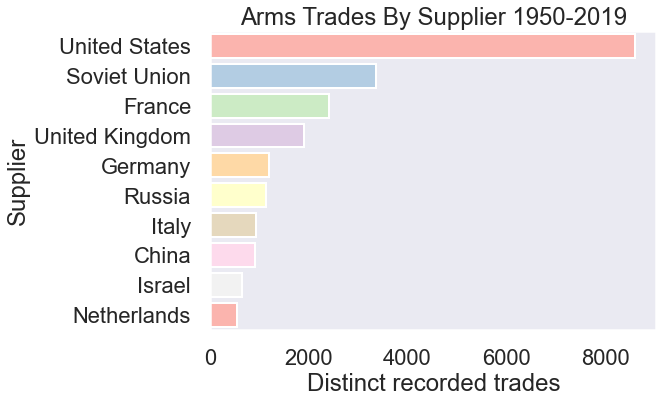

In [62]:
sns.countplot(y="Supplier", saturation=2, data=time_df, palette="Pastel1",
              order=time_df['Supplier'].value_counts().iloc[:10].index)
fig = plt.gcf()
ax = plt.gca()
ax.set_title("Arms Trades By Supplier 1950-2019")
ax.set_xlabel("Distinct recorded trades")
fig.savefig('./images/top_10_suppliers.png',bbox_inches='tight')

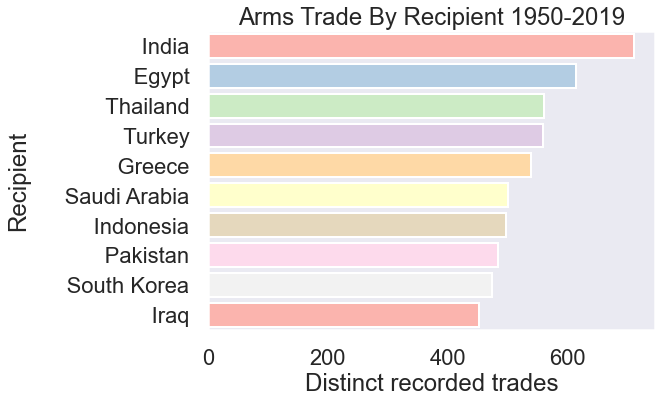

In [63]:
sns.countplot(y="Recipient", saturation=2, data=time_df, palette="Pastel1",
              order=time_df['Recipient'].value_counts().iloc[:10].index)

fig = plt.gcf()
ax = plt.gca()
ax.set_title("Arms Trade By Recipient 1950-2019")
ax.set_xlabel("Distinct recorded trades")
fig.savefig('./images/top_10_recipients.png',bbox_inches='tight')

In [64]:
time_df.Supplier.value_counts()

United States         8612
Soviet Union          3358
France                2407
United Kingdom        1904
Germany               1201
                      ... 
Mozambique               1
Dominican Republic       1
Bahrain                  1
Guyana                   1
Costa Rica               1
Name: Supplier, Length: 136, dtype: int64

In [65]:
time_df.describe()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,DeliveryYear,NDelivered,Comments
count,26631,26631,26631,26631,26631,26631,26631,26631
unique,136,335,770,3966,257,877,756,14507
top,United States,India,2,Mi-8MT/Mi-17,APC,Pending,2,None
freq,8612,711,2938,216,1494,652,2874,5035


In [66]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26631 entries, 1940-01-01 to 2019-01-01
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Supplier           26631 non-null  object
 1   Recipient          26631 non-null  object
 2   NOrdered           26631 non-null  object
 3   NoDesignation      26631 non-null  object
 4   WeaponDescription  26631 non-null  object
 5   DeliveryYear       26631 non-null  object
 6   NDelivered         26631 non-null  object
 7   Comments           26631 non-null  object
dtypes: object(8)
memory usage: 2.5+ MB


## Recipient + supplier combos df

In [67]:
rec_sup_df = final_df.copy()

In [68]:
rec_sup_df['RecSup'] = rec_sup_df["Supplier"] + "->" + rec_sup_df['Recipient']

rec_sup_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments,RecSup
3,Albania,Burkina Faso,12,M-43 120mm,Mortar,2011,2011,12,Probably second-hand,Albania-> Burkina Faso
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP,Algeria-> Angola
7,Algeria,Nigeria,2,Il-28,Bomber aircraft,1967,1968,2,Second-hand,Algeria-> Nigeria
8,Algeria,Western Sahara,3,BTR-60PB,APC,2016,2016,3,Second-hand; aid,Algeria-> Western Sahara
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid,Angola-> Congo


# Top trading partners plot, the US is the biggest supplier

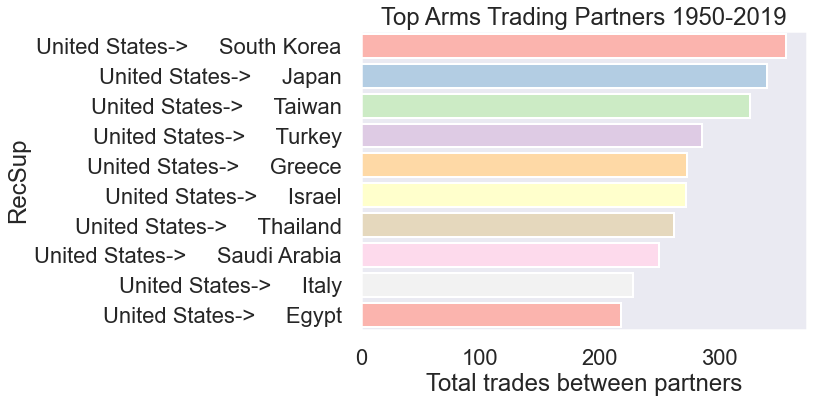

In [69]:
sns.countplot(y="RecSup", saturation=2, data=rec_sup_df, palette="Pastel1",
              order=rec_sup_df['RecSup'].value_counts().iloc[:10].index)

fig = plt.gcf()
ax = plt.gca()
ax.set_title("Top Arms Trading Partners 1950-2019")
ax.set_xlabel("Total trades between partners")
fig.savefig('./images/top_10_partners.png',bbox_inches='tight')

# Dataframe of the US vs. all other Suppliers

In [70]:
bool_df = final_df.copy()
bool_df['Supplier'] = bool_df['Supplier'].where(bool_df['Supplier'] == "United States", "Other")

bool_df["Supplier"].value_counts()

Other            18019
United States     8612
Name: Supplier, dtype: int64

In [71]:
bool_df['Supplier']=bool_df.replace({'Supplier' : { 'United States' : 1, 'Other' : 0}})

bool_df["Supplier"].value_counts()

0    18019
1     8612
Name: Supplier, dtype: int64

In [72]:
bool_df.describe()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
count,26631,26631,26631,26631,26631,26631,26631,26631,26631
unique,2,335,770,3966,257,77,877,756,14507
top,0,India,2,Mi-8MT/Mi-17,APC,1980,Pending,2,None
freq,18019,711,2938,216,1494,610,652,2874,5035


# Replace with mean year of delivery year estimations -- should do this on other DFs

In [73]:
bool_df['DeliveryYear'] = bool_df.replace({"DeliveryYear":{"Pending": 0}})
bool_df["DeliveryYear"] = bool_df['DeliveryYear'].astype(str).str.replace('+','').str.split('-', expand=True).astype(float).mean(axis=1)
                
bool_df.describe()

,DeliveryYear
count,26631.000000
mean,0.323383
std,0.467776
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [74]:
bool_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,0,Burkina Faso,12,M-43 120mm,Mortar,2011,0.0,12,Probably second-hand
6,0,Angola,4,N-262 Fregate,Transport aircraft,1980,0.0,4,Second-hand; incl for MP
7,0,Nigeria,2,Il-28,Bomber aircraft,1967,0.0,2,Second-hand
8,0,Western Sahara,3,BTR-60PB,APC,2016,0.0,3,Second-hand; aid
11,0,Congo,1,Noratlas,Transport aircraft,1979,0.0,1,Second-hand; aid


In [75]:
non_n_ordered_rows = pd.to_numeric(bool_df['NOrdered'], errors='coerce').isnull()

non_n_ordered_rows

3        False
6        False
7        False
8        False
11       False
         ...  
27026    False
27029    False
27032    False
27033    False
27034    False
Name: NOrdered, Length: 26631, dtype: bool

In [76]:
bool_df['NOrdered'].loc[non_n_ordered_rows] = 0 

bool_df['NOrdered'].loc[non_n_ordered_rows]

/Users/michaelburak/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


1349     0
1351     0
2109     0
2804     0
2810     0
4485     0
4829     0
5224     0
6170     0
6627     0
6955     0
9578     0
9598     0
10580    0
10719    0
13271    0
13382    0
13389    0
14802    0
16516    0
17388    0
17664    0
Name: NOrdered, dtype: object

In [77]:
bool_df["NOrdered"] = pd.to_numeric(bool_df["NOrdered"])

In [78]:
bool_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26631 entries, 3 to 27034
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Supplier           26631 non-null  object 
 1   Recipient          26631 non-null  object 
 2   NOrdered           26631 non-null  int64  
 3   NoDesignation      26631 non-null  object 
 4   WeaponDescription  26631 non-null  object 
 5   OrderYear          26631 non-null  object 
 6   DeliveryYear       26631 non-null  float64
 7   NDelivered         26631 non-null  object 
 8   Comments           26631 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 2.0+ MB


In [79]:
bool_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,0,Burkina Faso,12,M-43 120mm,Mortar,2011,0.0,12,Probably second-hand
6,0,Angola,4,N-262 Fregate,Transport aircraft,1980,0.0,4,Second-hand; incl for MP
7,0,Nigeria,2,Il-28,Bomber aircraft,1967,0.0,2,Second-hand
8,0,Western Sahara,3,BTR-60PB,APC,2016,0.0,3,Second-hand; aid
11,0,Congo,1,Noratlas,Transport aircraft,1979,0.0,1,Second-hand; aid


In [80]:
non_n_deliv_rows = pd.to_numeric(bool_df['NDelivered'], errors='coerce').isnull()

bool_df['NDelivered'].loc[non_n_deliv_rows] = 0 

bool_df["NDelivered"] = pd.to_numeric(bool_df["NDelivered"])

bool_df.head()

/Users/michaelburak/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,0,Burkina Faso,12,M-43 120mm,Mortar,2011,0.0,12,Probably second-hand
6,0,Angola,4,N-262 Fregate,Transport aircraft,1980,0.0,4,Second-hand; incl for MP
7,0,Nigeria,2,Il-28,Bomber aircraft,1967,0.0,2,Second-hand
8,0,Western Sahara,3,BTR-60PB,APC,2016,0.0,3,Second-hand; aid
11,0,Congo,1,Noratlas,Transport aircraft,1979,0.0,1,Second-hand; aid


In [81]:
bool_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26631 entries, 3 to 27034
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Supplier           26631 non-null  object 
 1   Recipient          26631 non-null  object 
 2   NOrdered           26631 non-null  int64  
 3   NoDesignation      26631 non-null  object 
 4   WeaponDescription  26631 non-null  object 
 5   OrderYear          26631 non-null  object 
 6   DeliveryYear       26631 non-null  float64
 7   NDelivered         26631 non-null  int64  
 8   Comments           26631 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 2.0+ MB


In [82]:
bool_df.Comments.value_counts()

None                                                                                            5035
Second-hand                                                                                     2067
Second-hand; aid                                                                                 598
Probably second-hand                                                                             150
Aid                                                                                              114
                                                                                                ... 
For Type-053 or Type-510 (Abu Bakr or Jianghu-3) frigates                                          1
CAD18 m ($13 m) deal; LG-1 Mk-2 version                                                            1
Mamba Mk-5 version                                                                                 1
$90 m deal (offsets 100% incl Spanish order for 15 AS-552UL helicopters); CN-235-100 versio

# Cleaning up Recipient and mostly Supplier for trailing whitespace and difficult characters for Neo4j

## problems with ' with neo4j querying means it needs to be removed

In [83]:
final_df['Recipient'] = final_df["Recipient"].str.replace("'", '')
final_df['Supplier'] = final_df["Supplier"].str.replace("'", '')

In [84]:
#checking for example Cote d'Ivoire for '
final_suppliers = final_df['Supplier'].unique()
final_suppliers

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Bosnia-Herzegovina', 'Brazil', 'Brunei',
       'Bulgaria', 'Cambodia', 'Canada', 'Chad', 'Chile', 'China',
       'Colombia', 'Costa Rica', 'Cote dIvoire', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Czechoslovakia', 'Denmark',
       'Dominican Republic', 'DR Congo', 'East Germany (GDR)', 'Ecuador',
       'Egypt', 'Eritrea', 'Estonia', 'Ethiopia', 'European Union**',
       'Europe multi-state', 'Fiji', 'Finland', 'FMLN (El Salvador)*',
       'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon',
       'Libya', 'Libya HoR', 'Lithuania', 'Luxembourg', 'Malawi',
       'Malaysia', 'Malta', '

In [85]:
#bunch of spaces to be stripped
final_recipients = final_df['Recipient'].unique()

final_recipients

array([' Burkina Faso', ' Angola', '     Nigeria', '     Western Sahara',
       ' Congo', '     Cote dIvoire', '     Guinea-Bissau',
       '     United States', ' Bolivia', '     Colombia', '     Denmark',
       '     Ecuador', '     Honduras', '     Paraguay', '     Spain',
       '     Sri Lanka', '     Uruguay', ' Sudan', ' Israel', ' India',
       '     Jordan', '     Malaysia', '     New Zealand',
       '     United Kingdom', '     Brazil', '     Brunei',
       '     Cambodia', '     Canada', '     Chad', '     Chile',
       '     Fiji', '     Ghana', '     India', '     Indonesia',
       '     Iraq', '     Jamaica', '     Japan', '     Kiribati',
       '     Kuwait', '     Laos', '     Lesotho',
       '     Marshall Islands', '     Micronesia', '     Nepal',
       '     Netherlands', '     Oman', '     Pakistan', '     Palau',
       '     Papua New Guinea', '     Philippines', '     Samoa',
       '     Singapore', '     Solomon Islands', '     Sweden',
       '     T

In [86]:
#final recipients and suppliers to clean up concatenated together
final_rs = np.concatenate([final_recipients,final_suppliers])

final_rs

array([' Burkina Faso', ' Angola', '     Nigeria', '     Western Sahara',
       ' Congo', '     Cote dIvoire', '     Guinea-Bissau',
       '     United States', ' Bolivia', '     Colombia', '     Denmark',
       '     Ecuador', '     Honduras', '     Paraguay', '     Spain',
       '     Sri Lanka', '     Uruguay', ' Sudan', ' Israel', ' India',
       '     Jordan', '     Malaysia', '     New Zealand',
       '     United Kingdom', '     Brazil', '     Brunei',
       '     Cambodia', '     Canada', '     Chad', '     Chile',
       '     Fiji', '     Ghana', '     India', '     Indonesia',
       '     Iraq', '     Jamaica', '     Japan', '     Kiribati',
       '     Kuwait', '     Laos', '     Lesotho',
       '     Marshall Islands', '     Micronesia', '     Nepal',
       '     Netherlands', '     Oman', '     Pakistan', '     Palau',
       '     Papua New Guinea', '     Philippines', '     Samoa',
       '     Singapore', '     Solomon Islands', '     Sweden',
       '     T

In [87]:
#down to unique recipients and suppliers
unique_rs = np.unique(final_rs)

unique_rs

array(['     ANC (South Africa)*', '     Afghanistan',
       '     African Union**', '     Albania', '     Algeria',
       '     Angola', '     Anti-Castro rebels (Cuba)*', '     Argentina',
       '     Armas (Guatemala)*', '     Armenia', '     Australia',
       '     Austria', '     Azerbaijan', '     Bahamas', '     Bahrain',
       '     Bangladesh', '     Barbados', '     Belarus', '     Belgium',
       '     Belize', '     Benin', '     Bhutan', '     Biafra',
       '     Bolivia', '     Bosnia-Herzegovina', '     Botswana',
       '     Brazil', '     Brunei', '     Bulgaria', '     Burkina Faso',
       '     Burundi', '     Cabo Verde', '     Cambodia',
       '     Cameroon', '     Canada', '     Central African Republic',
       '     Chad', '     Chile', '     China', '     Colombia',
       '     Comoros', '     Congo', '     Contras (Nicaragua)*',
       '     Costa Rica', '     Cote dIvoire', '     Croatia',
       '     Cuba', '     Cyprus', '     Czechia', '     

In [88]:
#stripping forward and trailing whitespace
unique_rs_clean = np.char.strip(unique_rs.astype(str))

unique_rs_clean

array(['ANC (South Africa)*', 'Afghanistan', 'African Union**', 'Albania',
       'Algeria', 'Angola', 'Anti-Castro rebels (Cuba)*', 'Argentina',
       'Armas (Guatemala)*', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Biafra',
       'Bolivia', 'Bosnia-Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Contras (Nicaragua)*',
       'Costa Rica', 'Cote dIvoire', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia', 'DR Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'ELF (Ethiopia)*', 'EPLF (Ethiopia)*',
       'East Germany (GDR)', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'FAN (Chad)*'

In [89]:
#making sure recipients and suppliers are unique, absolutely
unique_rs_clean=np.unique(unique_rs_clean)

In [90]:
unique_rs_clean

array(['(multiple sellers)', 'ANC (South Africa)*', 'Afghanistan',
       'African Union**', 'Albania', 'Algeria', 'Amal (Lebanon)*',
       'Angola', 'Anti-Castro rebels (Cuba)*', 'Argentina',
       'Armas (Guatemala)*', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Biafra',
       'Bolivia', 'Bosnia-Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Contras (Nicaragua)*',
       'Costa Rica', 'Cote dIvoire', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia', 'DR Congo', 'Darfur rebels (Sudan)*',
       'Denmark', 'Djibouti', 'Dominican Republic', 'ELF (Ethiopia)*',
       'EPLF (Ethiopia)*', 'East Germany (GDR)', 'Ecuador', 'Egypt',
       'El Salvador', 'Equ

# Py2Neo: Neo4j integration -- creating Actors for states with Names

In [91]:
#establish db connection to local db
graph = Graph(user="py2neo", password="py2neo")

#needed for new graph -> graph.schema.create_uniqueness_constraint('Actor', 'name')

In [92]:
# function select all of "set" in graph obj neo4j graph
def select_star(graph_obj):
    print(graph_obj.run("MATCH (n) RETURN (n)"))

In [93]:
select_star(graph)

 n                                          
--------------------------------------------
 (_795:Actor {name: '(multiple sellers)'})  
 (_796:Actor {name: 'ANC (South Africa)*'}) 
 (_797:Actor {name: 'Afghanistan'})         



In [94]:
#begin transaction?
tx = graph.begin()

In [95]:
final_df.head(10)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,Albania,Burkina Faso,12,M-43 120mm,Mortar,2011,2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,2,Il-28,Bomber aircraft,1967,1968,2,Second-hand
8,Algeria,Western Sahara,3,BTR-60PB,APC,2016,2016,3,Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
12,Angola,Cote dIvoire,2,BMP-2,IFV,2002,2002,2,Second-hand; for use against fight rebels
13,Angola,Cote dIvoire,2,T-55,Tank,2002,2002,2,Second-hand; for use against rebels
14,Angola,Guinea-Bissau,1,Do-27,Light aircraft,1980,1980,1,Second-hand; status uncertain
15,Angola,United States,250,FIM-92 Stinger,Portable SAM,1992,1992,250,Second-hand; delivered in 1980s as aid to UNIT...
18,Argentina,Bolivia,37,M-3/M-5 Half-track,APC,2006,2006,37,Second-hand; aid; M-5 and M-9 versions


## Creates Actors that supply and receive in Neo4j

In [96]:
# for name in unique_rs_clean:
#   graph.run("CREATE (:Actor {name: $name})", name=name)

## In retrospect the above could've been performed on the columns I clean anyway. Womp.

In [97]:
final_df["Recipient"]=final_df["Recipient"].astype(str).str.strip()

final_df["Recipient"]

3          Burkina Faso
6                Angola
7               Nigeria
8        Western Sahara
11                Congo
              ...      
27026            Zambia
27029           Liberia
27032           Czechia
27033            Zambia
27034            Zambia
Name: Recipient, Length: 26631, dtype: object

In [98]:
final_df["Recipient"].unique()

array(['Burkina Faso', 'Angola', 'Nigeria', 'Western Sahara', 'Congo',
       'Cote dIvoire', 'Guinea-Bissau', 'United States', 'Bolivia',
       'Colombia', 'Denmark', 'Ecuador', 'Honduras', 'Paraguay', 'Spain',
       'Sri Lanka', 'Uruguay', 'Sudan', 'Israel', 'India', 'Jordan',
       'Malaysia', 'New Zealand', 'United Kingdom', 'Brazil', 'Brunei',
       'Cambodia', 'Canada', 'Chad', 'Chile', 'Fiji', 'Ghana',
       'Indonesia', 'Iraq', 'Jamaica', 'Japan', 'Kiribati', 'Kuwait',
       'Laos', 'Lesotho', 'Marshall Islands', 'Micronesia', 'Nepal',
       'Netherlands', 'Oman', 'Pakistan', 'Palau', 'Papua New Guinea',
       'Philippines', 'Samoa', 'Singapore', 'Solomon Islands', 'Sweden',
       'Thailand', 'Timor-Leste', 'Tonga', 'Trinidad and Tobago',
       'Tuvalu', 'Vanuatu', 'Yemen', 'Australia', 'Uganda', 'Argentina',
       'Belgium', 'Czechia', 'Greece', 'Portugal', 'Saudi Arabia',
       'Slovenia', 'UAE', 'Bangladesh', 'Botswana', 'Egypt', 'France',
       'Gabon', 'German

In [99]:
final_df.head()

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,Albania,Burkina Faso,12,M-43 120mm,Mortar,2011,2011,12,Probably second-hand
6,Algeria,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl for MP
7,Algeria,Nigeria,2,Il-28,Bomber aircraft,1967,1968,2,Second-hand
8,Algeria,Western Sahara,3,BTR-60PB,APC,2016,2016,3,Second-hand; aid
11,Angola,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid


## Creates relationship of Actor supplied --> Actor with properties minus Comments of columns, takes a hot minute -- TBD: Clean up comment text to include

In [100]:
%timeit 
# for a,b,c,d,e,f,g in zip(final_df["Supplier"], final_df["Recipient"], final_df["WeaponDescription"], final_df['NoDesignation'], final_df['OrderYear'], final_df['DeliveryYear'], final_df['NDelivered']): 
#     graph.run(f"MATCH (a:Actor), (b:Actor) WHERE a.name = '{a}' AND b.name = '{b}'CREATE (a)-[:supplied {{weapon_description:'{c}', designation: '{d}', order_year:'{e}',delivery_year:'{f}',num_delivered: '{g}' }}]->(b)")

### Amount of transactions in final_df for sense of scale of the produced graph DB

In [101]:
len(final_df)

26631

# NLP Exploration of Comments

## T-sne and UMAP on text off Comments: need to clean up previous bool_df

In [102]:
bool_df = final_df.copy()

#eventual y / target
bool_df['Supplier'] = bool_df['Supplier'].where(bool_df['Supplier'] == "United States", "Other")
bool_df['Supplier']=bool_df.replace({'Supplier' : { 'United States' : 1, 'Other' : 0}})

#commenting out for now as valuable info
# bool_df['Recipient'] = bool_df['Recipient'].where(bool_df['Recipient'] == "United States", "Other")
# bool_df['Recipient']=bool_df.replace({'Recipient' : { 'United States' : 1, 'Other' : 0}})

bool_df['Supplier'].value_counts()

0    18019
1     8612
Name: Supplier, dtype: int64

In [103]:
stop = stopwords.words('english')

clean_comments = bool_df['Comments'] = bool_df['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

clean_comments

3                                     Probably second-hand
6                                     Second-hand; incl MP
7                                              Second-hand
8                                         Second-hand; aid
11                                        Second-hand; aid
                               ...                        
27026    J-1E version; possibly incl 2 RJ-1E reconnaiss...
27029              Second-hand (modernized Malta delivery)
27032                                          Second-hand
27033                 Ex-Rhodesian; taken aid independence
27034    Ex-Rhodesian; taken independence; Pembroke C-M...
Name: Comments, Length: 26631, dtype: object

## Comments T-SNE with y of Supplier

In [104]:
# tfidf = TfidfVectorizer()

# X = tfidf.fit_transform(clean_comments)
# y = bool_df['Supplier']

# tsne = TSNEVisualizer()
# tsne.fit(X, y)
# tsne.show()

## UMAP version of above

In [105]:
# umap = UMAPVisualizer()
# umap.fit(X,y)
# umap.show()

## UMAP Clustering all comments with corresponding words to clusters

In [106]:
# #clustering all comment

# clusters = KMeans(n_clusters=5)
# clusters.fit(X)

# umap = UMAPVisualizer()
# umap.fit(X, ["c{}".format(c) for c in clusters.labels_])
# umap.show(outpath="./images/umapwordcluster.png")

# tf_words = tfidf.get_feature_names()
# common_words = clusters.cluster_centers_.argsort()[:,-1:-11:-1]

# for num, centroid in enumerate(common_words):
#     print(str(num) + ' : ' + ', '.join(tf_words[word] for word in centroid))

#     common_words = clusters.cluster_centers_.argsort()[:,-1:-11:-1]

## Wordcloud because I'm basic -- second hand and aid dominate

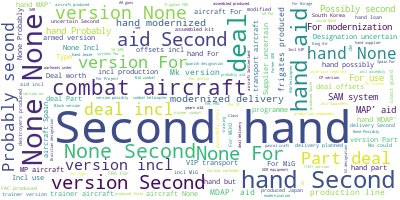

In [107]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate(clean_comments.to_string())

wordcloud.to_image()

# New Library and NetworkX time

In [108]:
# uri      = "bolt://localhost:7687" # in Neo4j Desktop
# user     = "admin"                   
# password = "py2neo"
# driver = GraphDatabase.driver(uri=uri,auth=(uri,password))

uri = "neo4j://localhost:7687"
driver = GraphDatabase.driver(uri, auth=("py2neo", "py2neo"))

In [109]:
# G = nx.Graph(driver)   # undirected graph
G = nx.DiGraph(driver) # directed graph

In [110]:
G.identifier_property = 'name'
G.relationship_type = 'supplied'
G.node_label = 'Actor'
G.base_params()

{'direction': 'NATURAL',
 'node_label': 'Actor',
 'relationship_type': 'supplied',
 'identifier_property': 'name'}

In [111]:
list(G.nodes())

['(multiple sellers)',
 'ANC (South Africa)*',
 'Afghanistan',
 'African Union**',
 'Albania',
 'Algeria',
 'Amal (Lebanon)*',
 'Angola',
 'Anti-Castro rebels (Cuba)*',
 'Argentina',
 'Armas (Guatemala)*',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Biafra',
 'Bolivia',
 'Bosnia-Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Contras (Nicaragua)*',
 'Costa Rica',
 'Cote dIvoire',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Czechoslovakia',
 'DR Congo',
 'Darfur rebels (Sudan)*',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'ELF (Ethiopia)*',
 'EPLF (Ethiopia)*',
 'East Germany (GDR)',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',

In [112]:
# nx.draw(G)

## Centrality algorithms - Bolivia is pagerank'd and otherwise the US is central

In [113]:
pagerank = nx.pagerank(G)

pagerank

{'(multiple sellers)': 0.15000000000000002,
 'ANC (South Africa)*': 0.15016316715204206,
 'Afghanistan': 0.3592628992990783,
 'African Union**': 0.1643683620882303,
 'Albania': 0.1766031270966239,
 'Algeria': 0.4126190973628778,
 'Amal (Lebanon)*': 0.24952164121605877,
 'Angola': 1.0968891325466508,
 'Anti-Castro rebels (Cuba)*': 0.150119865546441,
 'Argentina': 0.6897254355933267,
 'Armas (Guatemala)*': 0.15083905885003177,
 'Armenia': 0.1792477214253118,
 'Aruba': 0.15000000000000002,
 'Australia': 0.41123652997512605,
 'Austria': 0.2158756512033589,
 'Azerbaijan': 0.32711895078996256,
 'Bahamas': 0.1532218528607648,
 'Bahrain': 0.4644340168420378,
 'Bangladesh': 0.588242531772677,
 'Barbados': 0.1509858264359486,
 'Belarus': 0.15470859493551445,
 'Belgium': 0.26062701827441054,
 'Belize': 0.15136287094020376,
 'Benin': 0.9643888576118894,
 'Bhutan': 0.1732806149259563,
 'Biafra': 0.15620927051909525,
 'Bolivia': 1.4997885907767756,
 'Bosnia-Herzegovina': 0.24378797803200344,
 'Botsw

In [114]:
max(pagerank, key=pagerank.get)

'Bolivia'

In [115]:
between_central= nx.betweenness_centrality(G)

between_central

{'(multiple sellers)': 0.0,
 'ANC (South Africa)*': 0.0,
 'Afghanistan': 0.0,
 'African Union**': 0.0,
 'Albania': 0.2286974219810041,
 'Algeria': 290.51228573787756,
 'Amal (Lebanon)*': 0.0,
 'Angola': 1104.1282174170728,
 'Anti-Castro rebels (Cuba)*': 0.0,
 'Argentina': 19.231698036497367,
 'Armas (Guatemala)*': 0.0,
 'Armenia': 0.020833333333333332,
 'Aruba': 0.0,
 'Australia': 976.6273246557805,
 'Austria': 215.47777094836323,
 'Azerbaijan': 0.0,
 'Bahamas': 1.2889227650627413,
 'Bahrain': 19.550663633079402,
 'Bangladesh': 5.927005517703272,
 'Barbados': 0.0,
 'Belarus': 2.7500619967098636,
 'Belgium': 136.32221161820033,
 'Belize': 0.0,
 'Benin': 0.0,
 'Bhutan': 0.0,
 'Biafra': 0.0,
 'Bolivia': 0.0,
 'Bosnia-Herzegovina': 7.3343831641643895,
 'Botswana': 0.0,
 'Brazil': 588.726009609159,
 'Brunei': 0.0,
 'Bulgaria': 333.8527552601084,
 'Burkina Faso': 0.0,
 'Burundi': 0.0,
 'Cabo Verde': 0.0,
 'Cambodia': 237.0,
 'Cameroon': 0.0,
 'Canada': 534.6101214005821,
 'Central African Re

In [116]:
max(between_central, key=between_central.get)

'United States'

In [117]:
close_central = nx.closeness_centrality(G)

max(close_central, key=close_central.get)

'United States'

## Deriving propogation communities of interacting nodes

In [118]:
propogation_com = list(nx.label_propagation_communities(G))

propogation_com

[{'(multiple sellers)',
  'Argentina',
  'Bahrain',
  'Bolivia',
  'Brazil',
  'Chile',
  'Ecuador',
  'Malta',
  'Mexico',
  'Panama',
  'Taiwan',
  'Uruguay',
  'Venezuela'},
 {'ANC (South Africa)*'},
 {'Afghanistan', 'Bosnia-Herzegovina'},
 {'African Union**'},
 {'Albania',
  'Armenia',
  'Aruba',
  'Australia',
  'Austria',
  'Bahamas',
  'Bangladesh',
  'Belgium',
  'Brunei',
  'Bulgaria',
  'Burkina Faso',
  'Canada',
  'Chad',
  'China',
  'Costa Rica',
  'Croatia',
  'Czechia',
  'Czechoslovakia',
  'DR Congo',
  'Denmark',
  'East Germany (GDR)',
  'Egypt',
  'Estonia',
  'Europe multi-state',
  'Fiji',
  'Finland',
  'France',
  'Georgia',
  'Germany',
  'Ghana',
  'Guyana',
  'Hungary',
  'Iceland',
  'Indonesia',
  'Iraq',
  'Ireland',
  'Israel',
  'Italy',
  'Japan',
  'Jordan',
  'Kuwait',
  'Lebanon',
  'Libya',
  'Malaysia',
  'Moldova',
  'Montenegro',
  'Mujahedin (Afghanistan)*',
  'Netherlands',
  'New Zealand',
  'Nigeria',
  'North Yemen',
  'Norway',
  'Oman',
 

## Removing all singleton groups

In [119]:
propogation_com[:] = [x for x in propogation_com if len(x) > 1]

propogation_com

[{'(multiple sellers)',
  'Argentina',
  'Bahrain',
  'Bolivia',
  'Brazil',
  'Chile',
  'Ecuador',
  'Malta',
  'Mexico',
  'Panama',
  'Taiwan',
  'Uruguay',
  'Venezuela'},
 {'Afghanistan', 'Bosnia-Herzegovina'},
 {'Albania',
  'Armenia',
  'Aruba',
  'Australia',
  'Austria',
  'Bahamas',
  'Bangladesh',
  'Belgium',
  'Brunei',
  'Bulgaria',
  'Burkina Faso',
  'Canada',
  'Chad',
  'China',
  'Costa Rica',
  'Croatia',
  'Czechia',
  'Czechoslovakia',
  'DR Congo',
  'Denmark',
  'East Germany (GDR)',
  'Egypt',
  'Estonia',
  'Europe multi-state',
  'Fiji',
  'Finland',
  'France',
  'Georgia',
  'Germany',
  'Ghana',
  'Guyana',
  'Hungary',
  'Iceland',
  'Indonesia',
  'Iraq',
  'Ireland',
  'Israel',
  'Italy',
  'Japan',
  'Jordan',
  'Kuwait',
  'Lebanon',
  'Libya',
  'Malaysia',
  'Moldova',
  'Montenegro',
  'Mujahedin (Afghanistan)*',
  'Netherlands',
  'New Zealand',
  'Nigeria',
  'North Yemen',
  'Norway',
  'Oman',
  'Pakistan',
  'Philippines',
  'Poland',
  'Qat

## Checking if component nodes are connected -- all are

In [120]:
largest_cc = max(nx.connected_components(G), key=len)
len(largest_cc)

265

# Geospatial work
### Groups linked to countries need to be changed to that country for this mapping

In [121]:
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

In [122]:
# for idx,i in enumerate(propogation_com):
#     propogation_com[idx] = {get_continent(item) for item in i}

# propogation_com

In [123]:

# for idx,i in enumerate(propogation_com):
#     propogation_com[idx] = [x for x in i if x!= ('Unknown', 'Unknown')]

# propogation_com

In [124]:
# propogation_com[:] = [x for x in propogation_com if len(x) > 1]

# propogation_com

In [125]:
# # key = os.environ.get.whatever
# geocoder = OpenCageGeocode(key)

In [126]:
# #test US query

# query = 'US'  

# results = geocoder.geocode(query)

# print (results)

In [127]:
# lat = results[0]['geometry']['lat']

# lng = results[0]['geometry']['lng']

# print (lat, lng)

In [128]:
# # list_lat = []   # create empty lists

# # list_long = []

# lat_lng = []


# for idx,i in enumerate(propogation_com):
#     for j in i:
#         query = j[0]
#         results = geocoder.geocode(query)
#         lat = results[0]['geometry']['lat']
#         lng = results[0]['geometry']['lng']
# #         list_lat.append(lat)
# #         list_long.append(lng)
#         lat_lng.append([lat,lng])

# lat_lng

In [129]:
# country_l = []

# for idx, i in enumerate(propogation_com):
#     for dx,j in enumerate(i):
#         country_l[idx][dx] = [list_lat[idx], list_long[idx]]
        
# country_l

In [130]:
# df = pd.DataFrame(list(zip(list_lat, list_long)), 
#                columns =['lat', 'lng']) 
# df 

# Data prep for binary classification of U.S. or not as supplier

In [131]:
bool_df.head(10)

,Supplier,Recipient,NOrdered,NoDesignation,WeaponDescription,OrderYear,DeliveryYear,NDelivered,Comments
3,0,Burkina Faso,12,M-43 120mm,Mortar,2011,2011,12,Probably second-hand
6,0,Angola,4,N-262 Fregate,Transport aircraft,1980,1980,4,Second-hand; incl MP
7,0,Nigeria,2,Il-28,Bomber aircraft,1967,1968,2,Second-hand
8,0,Western Sahara,3,BTR-60PB,APC,2016,2016,3,Second-hand; aid
11,0,Congo,1,Noratlas,Transport aircraft,1979,1979,1,Second-hand; aid
12,0,Cote dIvoire,2,BMP-2,IFV,2002,2002,2,Second-hand; use fight rebels
13,0,Cote dIvoire,2,T-55,Tank,2002,2002,2,Second-hand; use rebels
14,0,Guinea-Bissau,1,Do-27,Light aircraft,1980,1980,1,Second-hand; status uncertain
15,0,United States,250,FIM-92 Stinger,Portable SAM,1992,1992,250,Second-hand; delivered 1980s aid UNITA bought ...
18,0,Bolivia,37,M-3/M-5 Half-track,APC,2006,2006,37,Second-hand; aid; M-5 M-9 versions


In [132]:
bool_df['WeaponDescription'].nunique()

257

In [133]:
#something about these will ruin the model if used like this
# bool_df['NOrdered'] = bool_df.replace({"NOrdered":{"Pending": 0}})
# bool_df['NDelivered'] = bool_df.replace({"NDelivered":{"Pending": 0}})

## Dropping Comments, N Ordered and Delivered
- Comments needs significant NLP work to be a viable feature, NOrdered and Delivered will cause modeling issues at this point for ??? reasons

In [156]:
modeling_df = bool_df.copy()

modeling_df = modeling_df.drop(["Comments", "NOrdered", "NDelivered"], axis=1)

modeling_df.head()

,Supplier,Recipient,NoDesignation,WeaponDescription,OrderYear,DeliveryYear
3,0,Burkina Faso,M-43 120mm,Mortar,2011,2011
6,0,Angola,N-262 Fregate,Transport aircraft,1980,1980
7,0,Nigeria,Il-28,Bomber aircraft,1967,1968
8,0,Western Sahara,BTR-60PB,APC,2016,2016
11,0,Congo,Noratlas,Transport aircraft,1979,1979


## Test-train split

In [157]:
X = modeling_df.drop("Supplier",axis=1)
y = modeling_df['Supplier'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,
                                                    stratify=y)

X_train.shape, X_test.shape

((18641, 5), (7990, 5))

## Encoding top 10 categories with one-hot of cat. features

In [ ]:
# ohe_enc = OneHotCategoricalEncoder(
#     top_categories=10,  # you can change this value to select more or less variables
#     # we can select which variables to encode
#     variables=['Recipient','NoDesignation',"WeaponDescription",'OrderYear','DeliveryYear'],
#     drop_last=False)

# ohe_enc.fit(X_train)

In [ ]:
# #results
# ohe_enc.encoder_dict_

In [ ]:
# X_train = ohe_enc.transform(X_train)
# X_test = ohe_enc.transform(X_test)

# X_train.head()

## SMOTE for imbalanced classes

In [ ]:
# #https://www.kaggle.com/qianchao/smote-with-imbalance-data

# print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
# print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# sm = SMOTE(random_state=2)
# X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

# print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

## Grid searched lasso Logistic Regression

In [ ]:
# parameters = {
#     'C': np.linspace(1, 10, 10)
#              }
# lr = LogisticRegression()
# clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
# clf.fit(X_train_res, y_train_res.ravel())
# clf.best_params_

### Note: solver liblinear needed to lasso l1 regression

In [ ]:
# lr1 = LogisticRegression(C=2,penalty='l1', verbose=5, solver="liblinear")
# lr1.fit(X_train_res, y_train_res.ravel())

# y_train_pre = lr1.predict(X_train)
# y_pre = lr1.predict(X_test)

## Using f1 weighted as an imbalanced metric

In [ ]:
# f1_score(y_test, y_pre, average='weighted')

## Grid searched AdaBoostClassifier

In [ ]:

f1_weighted = make_scorer(f1_score(y_test,y_pre,average="weighted"))


# #https://machinelearningmastery.com/adaboost-ensemble-in-python/
# model = AdaBoostClassifier()

# #param grid
# grid = dict()
# grid['n_estimators'] = [10, 50, 100, 500]
# grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1_weighted')

# grid_result = grid_search.fit(X_train_res, y_train_res.ravel())

# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

## Linear SVM

In [ ]:

# #Create a svm Classifier
# clf = svm.SVC(kernel='linear') # Linear Kernel

# #Train the model using the training sets
# clf.fit(X_train_res, y_train_res.ravel())

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)
# f1_score(y_test, y_pred, average='weighted')

## Multinomial NB

In [ ]:

# clf = MultinomialNB()

# clf.fit(X_train_res, y_train_res.ravel())

# y_pred = clf.predict(X_test)

# f1_score(y_test,y_pred,average="weighted")

## Feature Selection with KBest

In [ ]:

# # Create and fit selector
# selector = SelectKBest(f_classif, k=5)
# selector.fit(X_train_res, y_train_res.ravel())
# # Get columns to keep and create new dataframe with those only
# cols = selector.get_support(indices=True)
# features_df_new = X_train_res.iloc[:,cols]

In [ ]:
# X_train_res = features_df_new
# X_test = X_test.iloc[:,cols]

In [ ]:
# clf = MultinomialNB()

# clf.fit(X_train_res, y_train_res.ravel())

# y_pred = clf.predict(X_test)

# f1_score(y_test,y_pred,average="weighted")

In [ ]:


# clf = svm.SVC(kernel='linear') # Linear Kernel

# clf.fit(X_train_res, y_train_res.ravel())

# y_pred = clf.predict(X_test)
# f1_score(y_test, y_pred, average='weighted')

In [ ]:
# grid_result = grid_search.fit(X_train_res, y_train_res.ravel())
# # summarize the best score and configuration
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Neural network classifier

In [ ]:
#input dimensions
# len(X_train_res.columns)

## Still figuring out weighted f1 score for keras so commenting this out

In [ ]:

# classifier = Sequential()
# #First Hidden Layer
# classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=5))
# #Second  Hidden Layer
# classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
# #Output Layer
# classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

# #Compiling the neural network
# classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

# #Fitting the data to the training dataset
# classifier.fit(X_train_res,y_train_res.ravel(), batch_size=10, epochs=100)

In [ ]:

# clf = RidgeClassifierCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(X_train_res, y_train_res.ravel())

# y_pred = clf.predict(X_test)

# f1_score(y_test, y_pred, average='weighted')

In [ ]:

# clf = MLPClassifier()

# clf.fit(X_train_res,y_train_res.ravel())

# y_pred = clf.predict(X_test)

# f1_score(y_test,y_pred,average="weighted")

## ADASYN sampling

In [ ]:

# print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
# print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# sm = SMOTE(random_state=2)
# X_train_ada, y_train_ada = sm.fit_sample(X_train, y_train)

# print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


In [ ]:

# parameters = {
#     'C': np.linspace(1, 10, 10)
#              }
# lr = LogisticRegression()
# clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
# clf.fit(X_train_ada, y_train_ada)
# clf.best_params_

In [ ]:
# lr1 = LogisticRegression(C=1.0,penalty='l1', verbose=5, solver="liblinear")
# lr1.fit(X_train_ada, y_train_ada)

# y_train_pre = lr1.predict(X_train)
# y_pre = lr1.predict(X_test)

# f1_score(y_test, y_pre, average='weighted')

# Sampling top 15 features

## Test-train split

In [ ]:
# X = modeling_df.drop("Supplier",axis=1)
# y = modeling_df['Supplier'].astype(int)

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,
#                                                     stratify=y)

# X_train.shape, X_test.shape

## Encoding top 15 categories

In [ ]:
# ohe_enc = OneHotCategoricalEncoder(
#     top_categories=15,

#     variables=['Recipient','NoDesignation',"WeaponDescription",'OrderYear','DeliveryYear'],
#     drop_last=False)

# ohe_enc.fit(X_train)

In [ ]:
# #results
# ohe_enc.encoder_dict_

In [ ]:
# X_train = ohe_enc.transform(X_train)
# X_test = ohe_enc.transform(X_test)

# X_train.head()

## SMOTE 

In [ ]:

# print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
# print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

# sm = SMOTE(random_state=2)
# X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

# print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
# print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

## Testing more features with MultinomialNB

In [ ]:

# clf = MultinomialNB()

# clf.fit(X_train_res, y_train_res.ravel())

# y_pred = clf.predict(X_test)

# f1_score(y_test,y_pred,average="weighted")

# Comparing performance with scaling encoded features

## Test-train split

In [158]:

def n_feature_compare(n_feature,X,y):
    start = time.time()
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,
                                                    stratify=y)
    ohe_enc = OneHotCategoricalEncoder(
    top_categories=n_feature,

    variables=['Recipient','NoDesignation',"WeaponDescription",'OrderYear','DeliveryYear'],
    drop_last=False)

    ohe_enc.fit(X_train)
    
    X_train = ohe_enc.transform(X_train)
    X_test = ohe_enc.transform(X_test)
    
    sm = SMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
    
    clf = MultinomialNB()

    clf.fit(X_train_res, y_train_res.ravel())

    y_pred = clf.predict(X_test)
    
    f1_weighted = f1_score(y_test,y_pred,average='weighted')
    
    elapsed_time = (time.time() - start) 

    print(f"F1 weighted is {f1_weighted} at {n_feature} features taking {elapsed_time}.")

In [137]:
f = [10,15,20,50,100]

for i in f:
    n_feature_compare(i,X,y)

F1 weighted is 0.6717880435619822 at 10 features taking 2.800858974456787.
F1 weighted is 0.6880479658990297 at 15 features taking 4.0575270652771.
F1 weighted is 0.7015938422001758 at 20 features taking 5.596353769302368.
F1 weighted is 0.7388272775165264 at 50 features taking 18.33078908920288.
F1 weighted is 0.7770683508996026 at 100 features taking 40.88431787490845.


In [ ]:
feature_amounts = [10,15,20,25,50,100, 200,500,1000]

for amount in feature_amounts:
    n_feature_compare(amount,X,y)

In [ ]:
n_feature_compare(200,X,y)

In [151]:
from sklearn.decomposition import PCA

In [152]:
X

,Recipient_Afghanistan,Recipient_African Union**,Recipient_Albania,Recipient_Algeria,Recipient_Amal (Lebanon)*,Recipient_Angola,Recipient_Anti-Castro rebels (Cuba)*,Recipient_Argentina,Recipient_Armas (Guatemala)*,Recipient_Armenia,...,DeliveryYear_2016-2017,DeliveryYear_2016-2018,DeliveryYear_2016-2019,DeliveryYear_2017,DeliveryYear_2017-2018,DeliveryYear_2017-2019,DeliveryYear_2018,DeliveryYear_2018-2019,DeliveryYear_2019,DeliveryYear_Pending
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27029,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,
                                                    stratify=y)

In [159]:
ohe_enc = OneHotCategoricalEncoder(
    top_categories=1000,variables=['Recipient','NoDesignation',"WeaponDescription",'OrderYear','DeliveryYear'],
    drop_last=False)

ohe_enc.fit(X_train)
    
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

In [160]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [161]:
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())


In [162]:
from sklearn.decomposition import PCA

pca = PCA(.95)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [167]:
from sklearn.preprocessing import MinMaxScaler 
mm = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)

In [168]:
clf = MultinomialNB()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
    
f1_weighted = f1_score(y_test,y_pred,average='weighted')


In [169]:
print(f1_weighted)

0.8731623006870054


In [138]:
dummy_df = pd.get_dummies(modeling_df, columns=['Recipient','NoDesignation',"WeaponDescription",'OrderYear','DeliveryYear'],
                         drop_first=True)
cols = dummy_df.drop("Supplier",axis=1)

cols.columns

Index(['Recipient_Afghanistan', 'Recipient_African Union**',
       'Recipient_Albania', 'Recipient_Algeria', 'Recipient_Amal (Lebanon)*',
       'Recipient_Angola', 'Recipient_Anti-Castro rebels (Cuba)*',
       'Recipient_Argentina', 'Recipient_Armas (Guatemala)*',
       'Recipient_Armenia',
       ...
       'DeliveryYear_2016-2017', 'DeliveryYear_2016-2018',
       'DeliveryYear_2016-2019', 'DeliveryYear_2017', 'DeliveryYear_2017-2018',
       'DeliveryYear_2017-2019', 'DeliveryYear_2018', 'DeliveryYear_2018-2019',
       'DeliveryYear_2019', 'DeliveryYear_Pending'],
      dtype='object', length=5432)

In [ ]:
# from sklearn.experimental import enable_hist_gradient_boosting
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn.model_selection import cross_val_score

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,
#                                                     stratify=y)
# ohe_enc = OneHotCategoricalEncoder(top_categories=500,
#                                    variables=['Recipient','NoDesignation',"WeaponDescription",'OrderYear',
#                                               'DeliveryYear'],drop_last=False)

# ohe_enc.fit(X_train)
    
# X_train = ohe_enc.transform(X_train)
# X_test = ohe_enc.transform(X_test)
    
# sm = SMOTE(random_state=2)
# X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
 
# model = HistGradientBoostingClassifier(max_bins=255, max_iter=100)
# # define the evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# # evaluate the model and collect the scores
# n_scores = cross_val_score(model, X_train_res, y_train_res, scoring='f1_weighted', cv=cv, n_jobs=-1)
# # report performance
# print('f1 weighted: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# #     clf = MultinomialNB()

# #     clf.fit(X_train_res, y_train_res.ravel())

# #     y_pred = clf.predict(X_test)
    
# #     f1_weighted = f1_score(y_test,y_pred,average='weighted')
    
# #     elapsed_time = (time.time() - start) 

# #     print(f"F1 weighted is {f1_weighted} at {n_feature} features taking {elapsed_time}.")

In [ ]:
# import catboost
# from catboost import CatBoostClassifier